In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [3]:
import statsmodels.api as sm

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
boston_dataset = load_boston()

In [6]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
type(boston_dataset)

sklearn.utils.Bunch

In [8]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [9]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
print(boston_dataset.filename)

C:\Users\prade\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [13]:
print(boston_dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [14]:
data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
data['PRICE']=boston_dataset.target

In [17]:
data.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [18]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [19]:
data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [20]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [21]:
pd.isnull(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

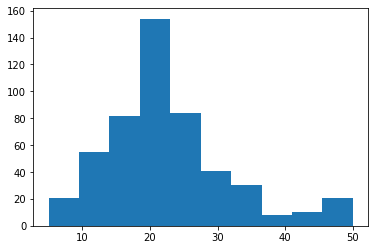

In [24]:
plt.hist(data['PRICE'])

Text(0, 0.5, 'no.of.houses')

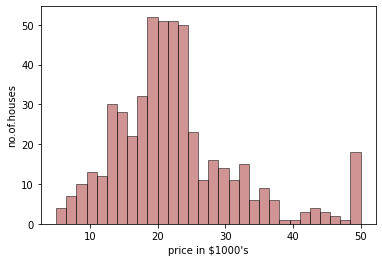

In [25]:
plt.hist(data['PRICE'],ec='black',bins=30,color='brown',alpha=0.5)
plt.xlabel('price in $1000\'s')
plt.ylabel('no.of.houses')

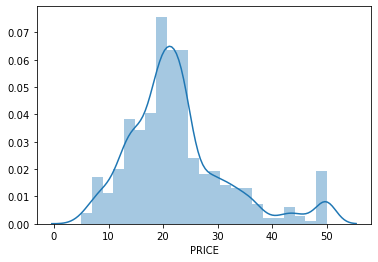

In [26]:
sns.distplot(data['PRICE'])

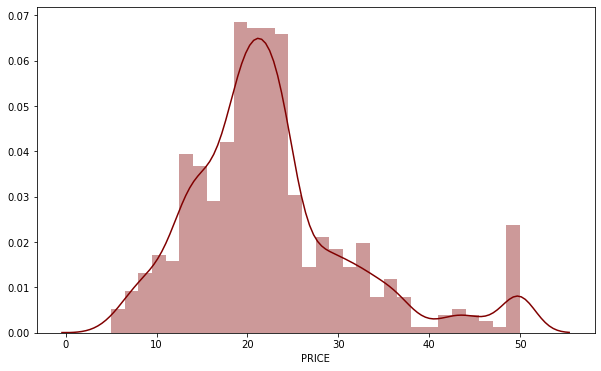

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(data["PRICE"],color='#800000',bins=30)

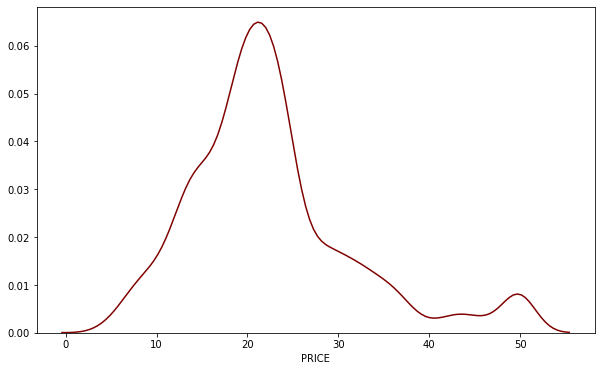

In [28]:
plt.figure(figsize=(10,6))
sns.distplot(data["PRICE"],hist=0,color='#800000')

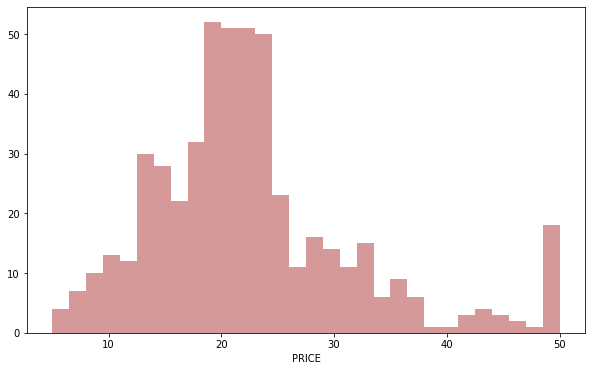

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(data["PRICE"],kde=0,color='#990000',bins=30)

Text(0, 0.5, 'Nr of Houses')

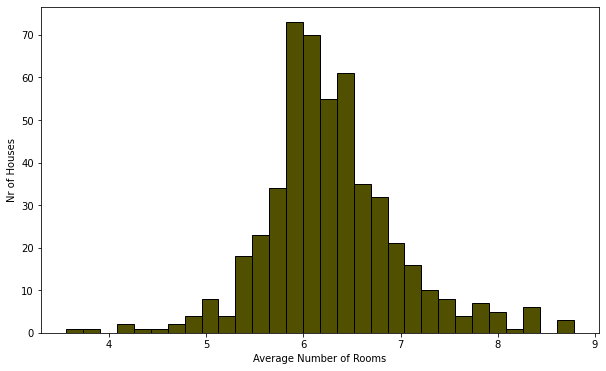

In [30]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black',color='#505000',bins=30)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr of Houses')
#Use plt.show() to get only plot not values
#no.of bins decreases the y-axis values

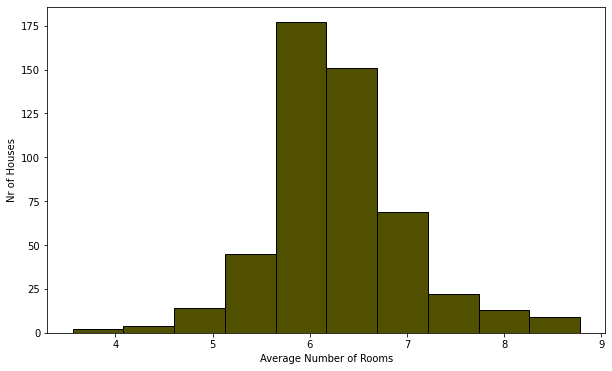

In [31]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black',color='#505000')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr of Houses')
plt.show()

In [32]:
data['RM'].mean()

6.284634387351787

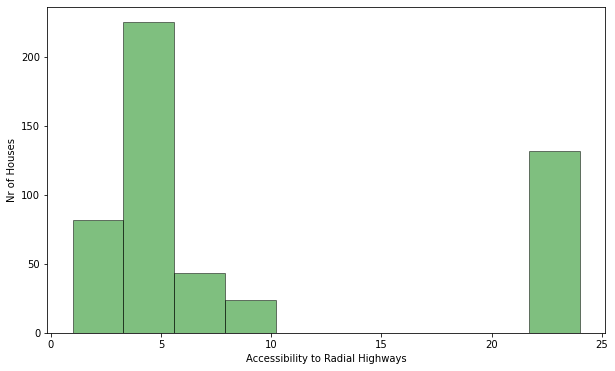

In [33]:
plt.figure(figsize= (10,6))
plt.hist(data['RAD'], ec = 'black', color = 'green', alpha = 0.5)
plt.xlabel('Accessibility to Radial Highways')
plt.ylabel('Nr of Houses')
plt.show()

In [34]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

## Barcharts _Accessibility to Radial High way and number of houses

In [35]:
accessibility = data['RAD'].value_counts()
type(accessibility)

pandas.core.series.Series

In [36]:
print(accessibility)

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [37]:
print(accessibility.index)

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')


In [38]:
accessibility.values

array([132, 115, 110,  38,  26,  24,  24,  20,  17], dtype=int64)

In [39]:
accessibility.index

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

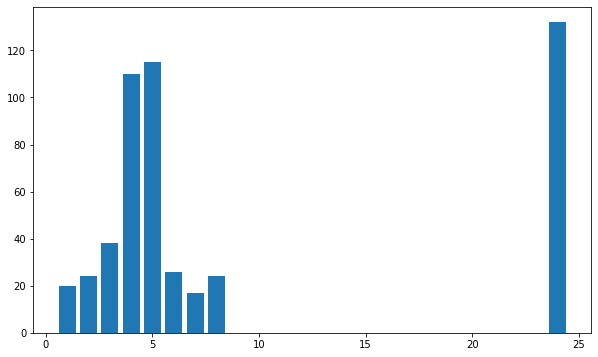

In [40]:
# my bar chart
plt.figure(figsize= (10,6))

plt.bar(accessibility.index, accessibility )
plt.show()

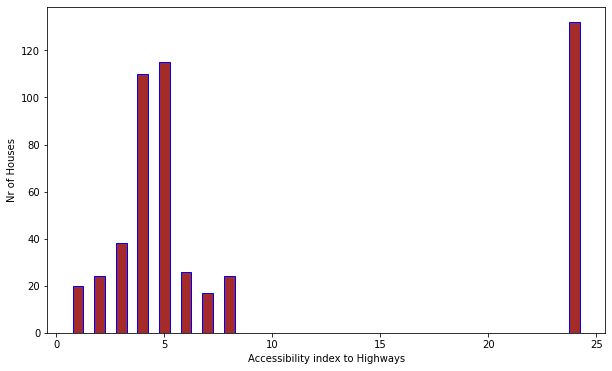

In [41]:
plt.figure(figsize= (10,6))
plt.bar(accessibility.index, accessibility.values, color ='brown', ec = 'blue', width = 0.5)# changing the width, color and ec
plt.xlabel('Accessibility index to Highways')
plt.ylabel('Nr of Houses')
plt.show()

In [42]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

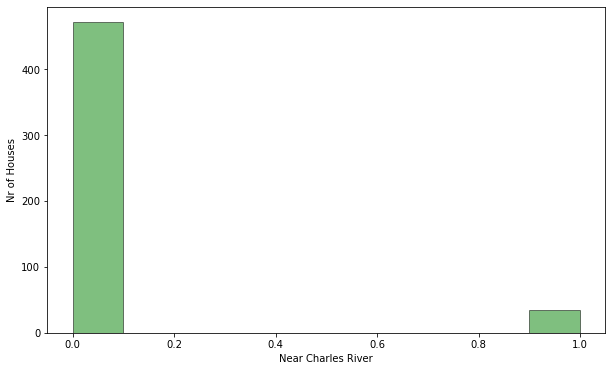

In [43]:
plt.figure(figsize= (10,6))
plt.hist(data['CHAS'], ec = 'black', color = 'green', alpha = 0.5)
plt.xlabel('Near Charles River')
plt.ylabel('Nr of Houses')
plt.show()

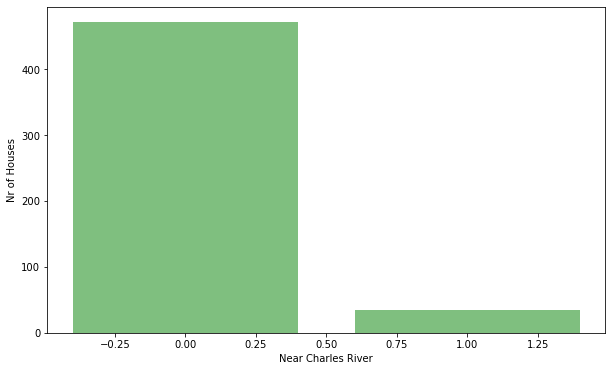

In [44]:
plt.figure(figsize= (10,6))
plt.bar(data['CHAS'].unique(),data['CHAS'].value_counts(), color = 'green', alpha = 0.5)
plt.xlabel('Near Charles River')
plt.ylabel('Nr of Houses')
plt.show()

In [45]:
data['PRICE'].min()

5.0

In [46]:
data['PRICE'].max()

50.0

In [47]:
data['PRICE'].mean()

22.532806324110698

In [48]:
data['PRICE'].median()

21.2

In [49]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [50]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [51]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [52]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [53]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [54]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [55]:
data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

# Correlation

In [56]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [57]:
# Price and PTRATIO  pupil-teacher ratio by town
# pupil-teacher ratio ??? 
# pupil - teacher ratio
# pupil/teacher ???    .....21/1........pupil ratio 21
# smaller the pupil - teacher ratio the better?
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [58]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [59]:
type(data.corr())

pandas.core.frame.DataFrame

In [60]:
masker=np.zeros_like(data.corr())

In [61]:
masker

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
triangle_indices=np.triu_indices_from(masker,k=-2)
masker[triangle_indices]=True

In [63]:
masker

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

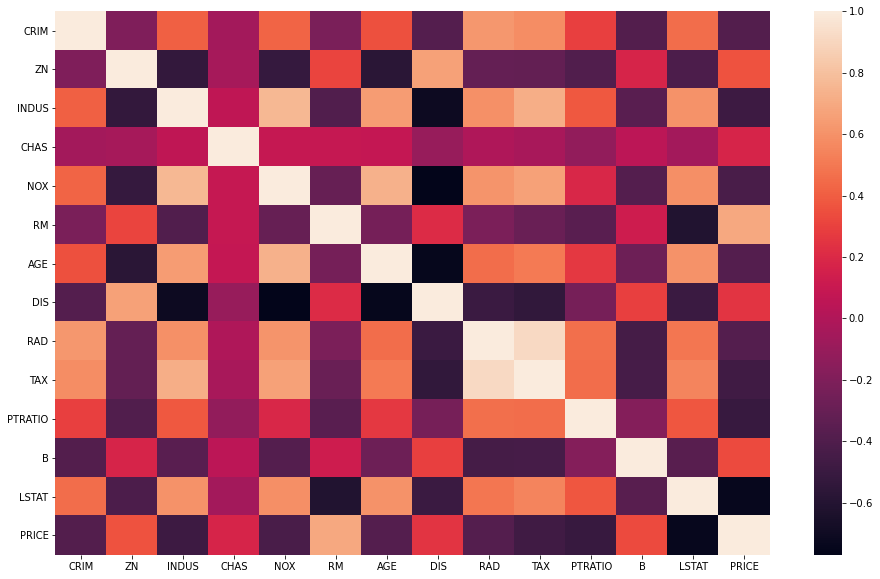

In [64]:
# Heat map
plt.figure(figsize =(16,10))

sns.heatmap(data.corr())

plt.show()

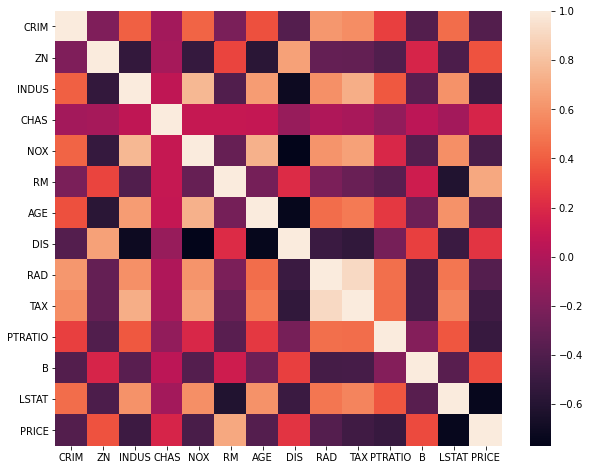

In [65]:
plt.figure(figsize =(10,8))# reduced the size
sns.heatmap(data.corr())
plt.xticks(fontsize = 10)#adjusted the fonts on the x axis
plt.yticks(fontsize = 10)# adjusted the font on the y axis
plt.show()


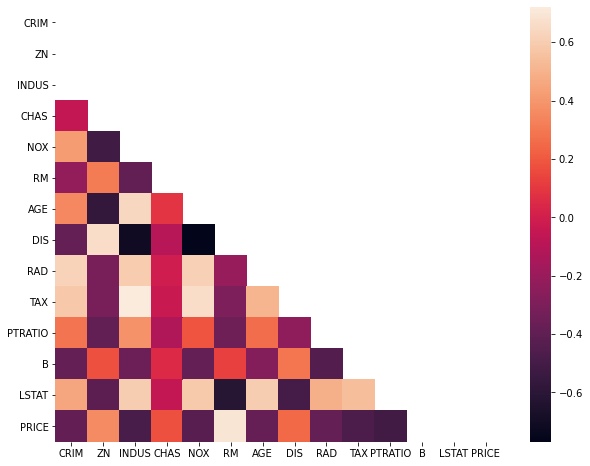

In [66]:
plt.figure(figsize =(10,8))# reduced the size
sns.heatmap(data.corr(),mask=masker)
plt.xticks(fontsize = 10)#adjusted the fonts on the x axis
plt.yticks(fontsize = 10)# adjusted the font on the y axis
plt.show()


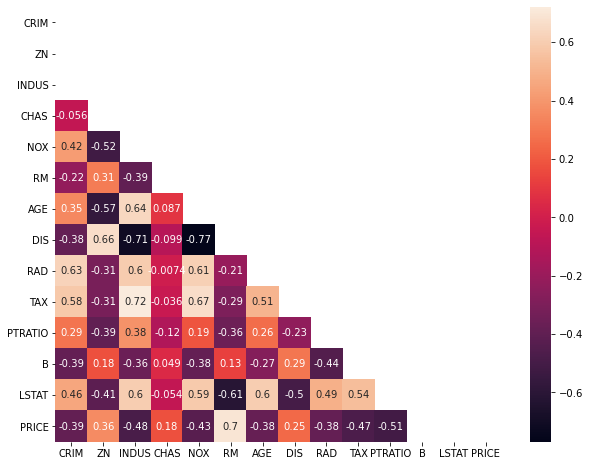

In [67]:
plt.figure(figsize =(10,8))# reduced the size
sns.heatmap(data.corr(),mask=masker,annot=True)
plt.xticks(fontsize = 10)#adjusted the fonts on the x axis
plt.yticks(fontsize = 10)# adjusted the font on the y axis
plt.show()


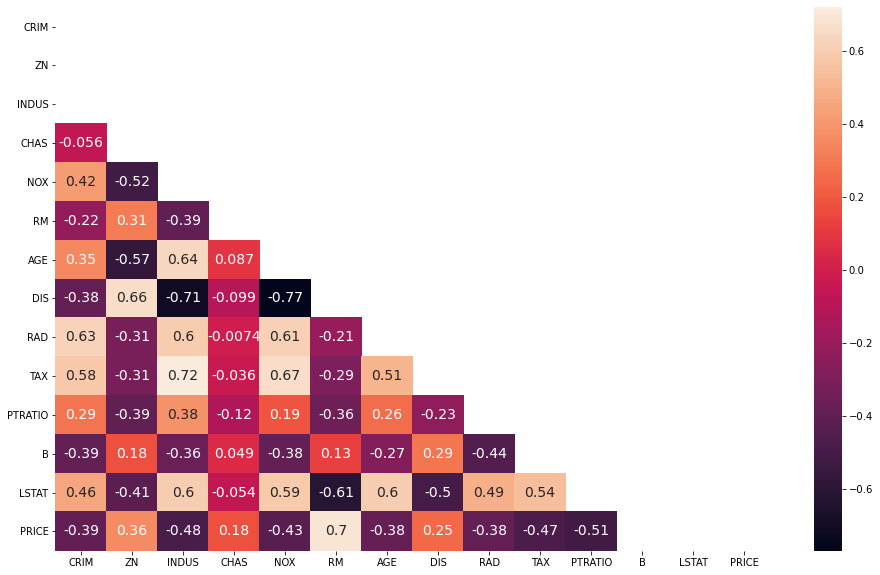

In [68]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), mask = masker, annot=True,annot_kws={'size': 14} )
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

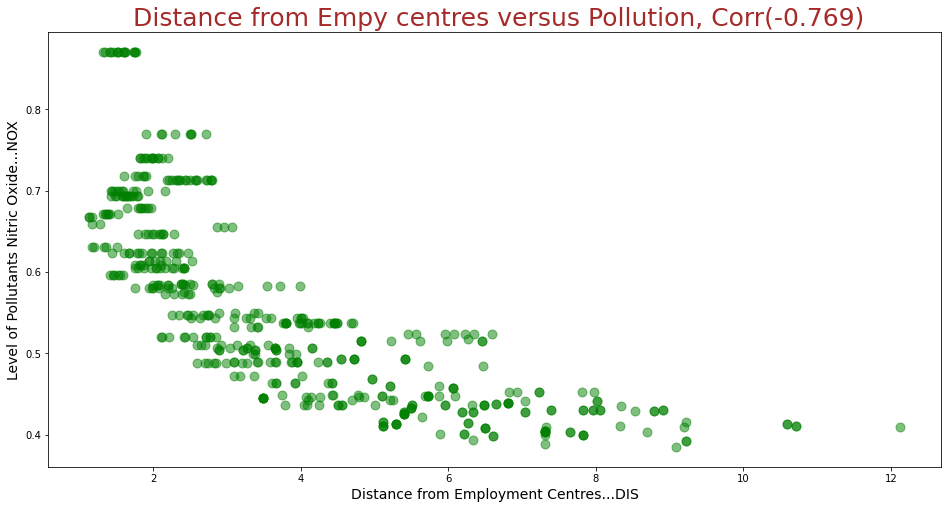

In [69]:
# Advanced Visualisations
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)
nox_dis_corr
plt.figure(figsize = (16, 8))
plt.scatter(x=data['DIS'], y =data['NOX'], alpha = 0.5, color = 'green', s= 80)
plt.title(f' Distance from Empy centres versus Pollution, Corr({nox_dis_corr})', fontsize = 25, color ='brown' )
plt.xlabel( 'Distance from Employment Centres...DIS', fontsize =14, color = 'black' )
plt.ylabel( 'Level of Pollutants Nitric Oxide...NOX', fontsize =14, color = 'black' )
plt.show()


In [70]:
nox_dis_corr

-0.769

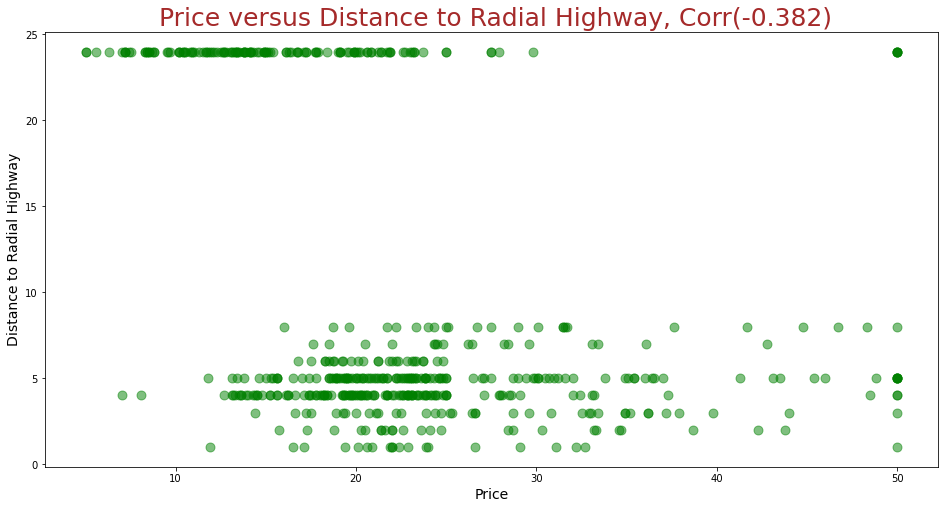

In [71]:
price_rad_corr = round(data['PRICE'].corr(data['RAD']), 3)
price_rad_corr
plt.figure(figsize = (16, 8))
plt.scatter(x=data['PRICE'], y =data['RAD'], alpha = 0.5, color = 'green', s= 80)
plt.title(f' Price versus Distance to Radial Highway, Corr({price_rad_corr})', fontsize = 25, color ='brown' )
plt.xlabel( 'Price', fontsize =14, color = 'black' )
plt.ylabel( 'Distance to Radial Highway', fontsize =14, color = 'black' )
plt.show()

In [72]:
price_rad_corr

-0.382

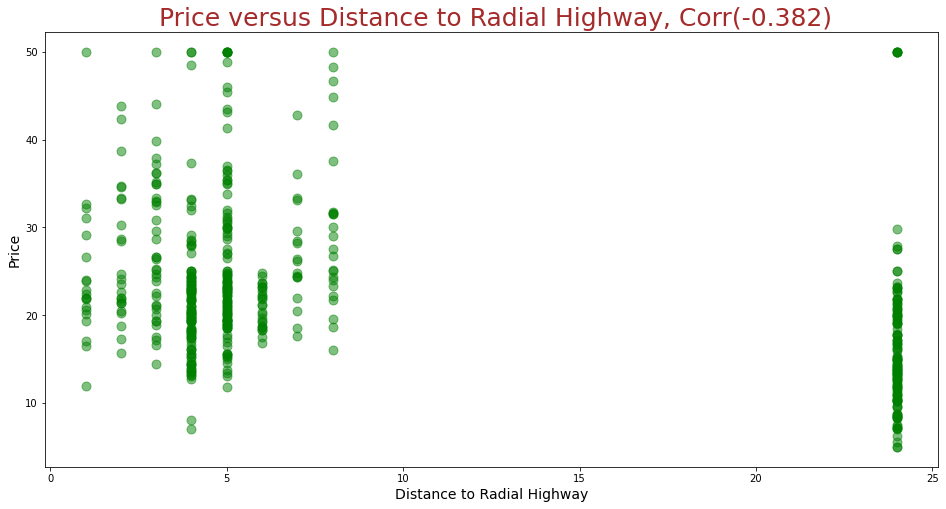

In [73]:
rad_price_corr = round(data['RAD'].corr(data['PRICE']), 3)
rad_price_corr
plt.figure(figsize = (16, 8))
plt.scatter(y=data['PRICE'], x =data['RAD'], alpha = 0.5, color = 'green', s= 80)
plt.title(f' Price versus Distance to Radial Highway, Corr({rad_price_corr})', fontsize = 25, color ='brown' )
plt.ylabel( 'Price', fontsize =14, color = 'black' )
plt.xlabel( 'Distance to Radial Highway', fontsize =14, color = 'black' )
plt.show()

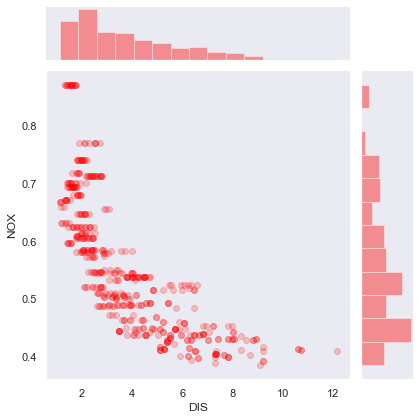

In [74]:
# using seaborn to plot
sns.set() # resets any previous styling
sns.set_style('dark')
sns.jointplot(x = data['DIS'], y = data['NOX'], color = 'red', joint_kws = {'alpha':0.2})
plt.show()

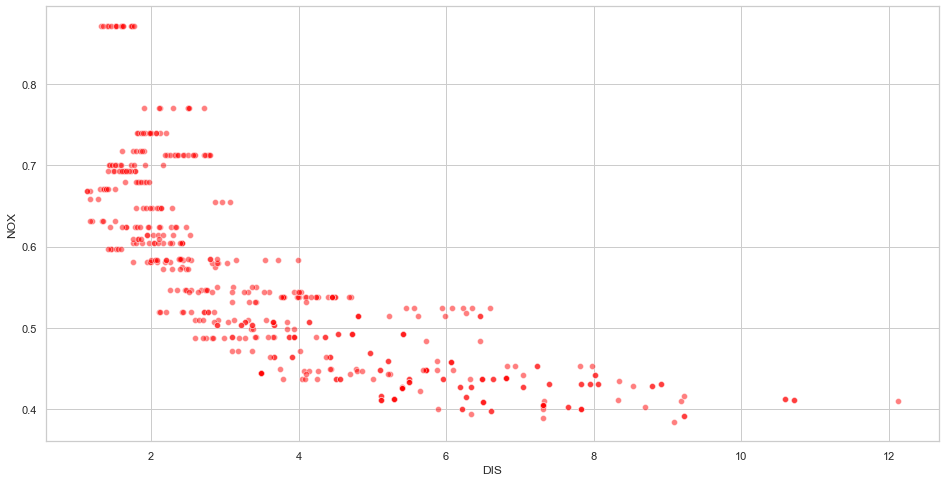

In [75]:
sns.set() # to reset any previous styling
sns.set_style('whitegrid')# to set style.
plt.figure(figsize = (16, 8))
sns.scatterplot(x=data['DIS'], y =data['NOX'], color = 'red', alpha = 0.5) # joint plot creates  scatter plot 
plt.show()


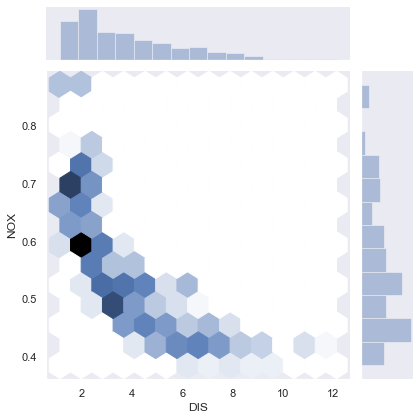

In [76]:
sns.set() 
sns.set_style('dark')
sns.jointplot(x=data['DIS'], y =data['NOX'], kind = 'hex' ) # kind is hex, darker hexagons in regions of higher density
plt.show()

In [77]:
# TAX and RAD

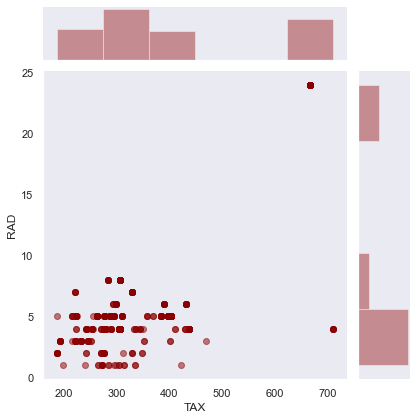

In [78]:
sns.set() # to reset any previous styling
sns.set_style('dark')# to set style.
sns.jointplot(x=data['TAX'], y =data['RAD'], color = 'darkred', joint_kws = {'alpha' : 0.5} ) # jointplot gives  scatter plot 
plt.show()

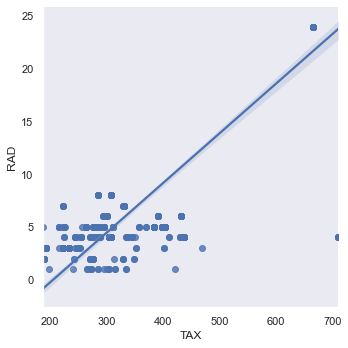

In [79]:
# regression plot...lmplot....
sns.lmplot(x ='TAX', y = 'RAD', data = data)
plt.show()


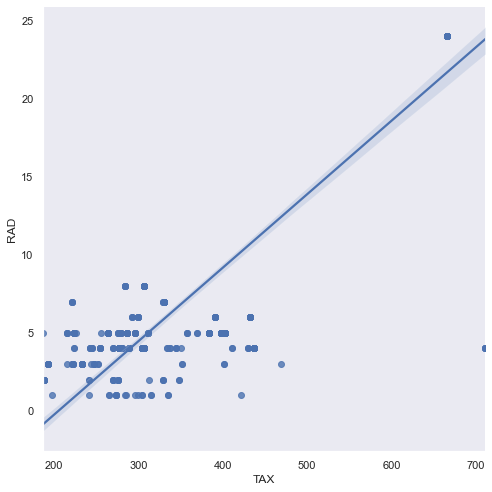

In [80]:
sns.lmplot(x ='TAX', y = 'RAD', data = data, height = 7)
plt.show()


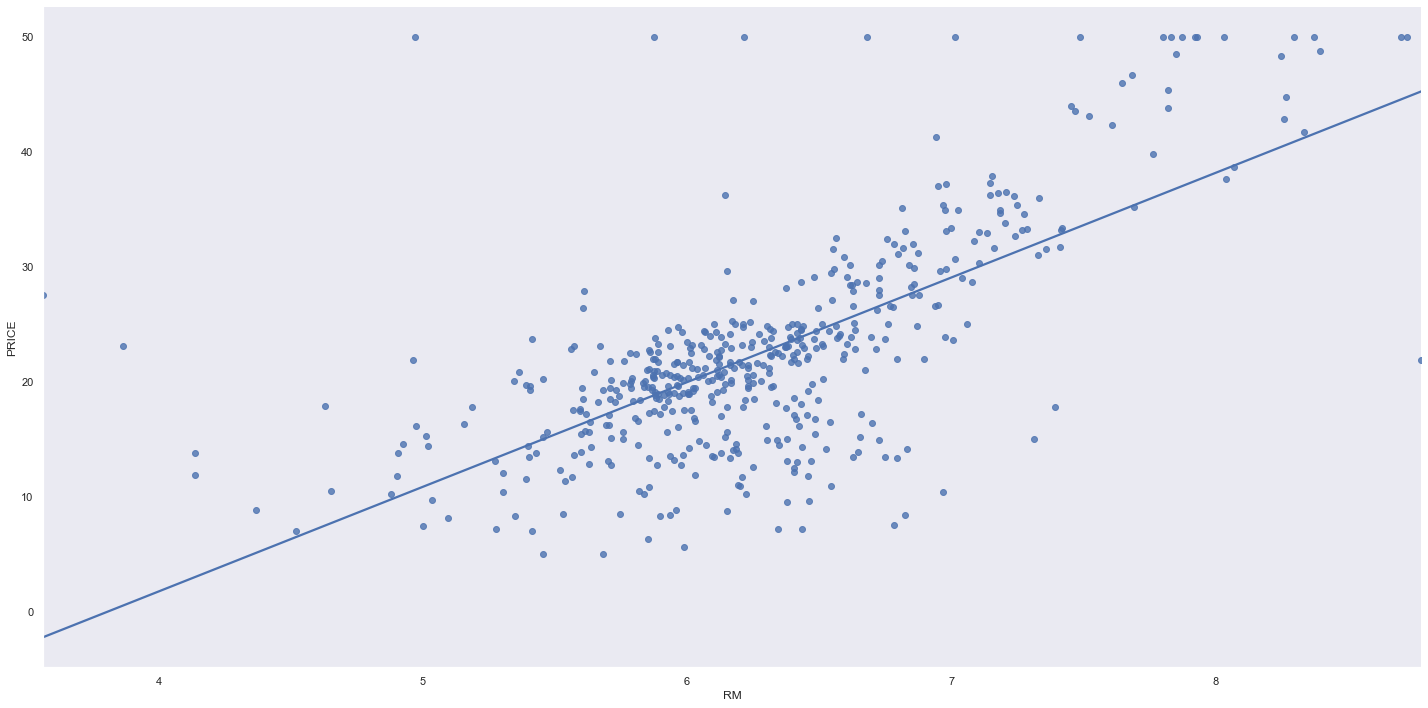

In [81]:
sns.lmplot(x ='RM', y = 'PRICE', data = data, height =10, aspect = 2,  ci= None  )
plt.show()

In [82]:
# sns.pairplot(data)
# plt.show()

In [83]:
# sns.pairplot(data, kind = 'reg' , plot_kws = {'line_kws':{'color': 'red'}})
# plt.show()

In [84]:
# Multivariable regression
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [85]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

In [86]:
prices

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [87]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [88]:
# train, test split......
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state = 10)


In [89]:
len(X_train)

404

In [90]:
len(features)

506

In [91]:
(len(X_train)/len(features))*100

79.84189723320159

In [92]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [93]:
y_train

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: PRICE, Length: 404, dtype: float64

In [94]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
305,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4.0,337.0,16.1,396.90,4.67
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22


In [95]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: PRICE, Length: 102, dtype: float64

In [96]:
regr = LinearRegression()
regr.fit(X_train, y_train) # I am using the training data to train the model

LinearRegression()

In [97]:
regr.coef_

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

In [98]:
regr.intercept_

36.53305138282439

In [99]:
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['Coef'])

,Coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [100]:
regr.score(X_train, y_train) # score on train data, that the model has seen

0.750121534530608

In [101]:
regr.score(X_test, y_test) # score on the test data the model has not seen before

0.6709339839115628

## Data Transformation

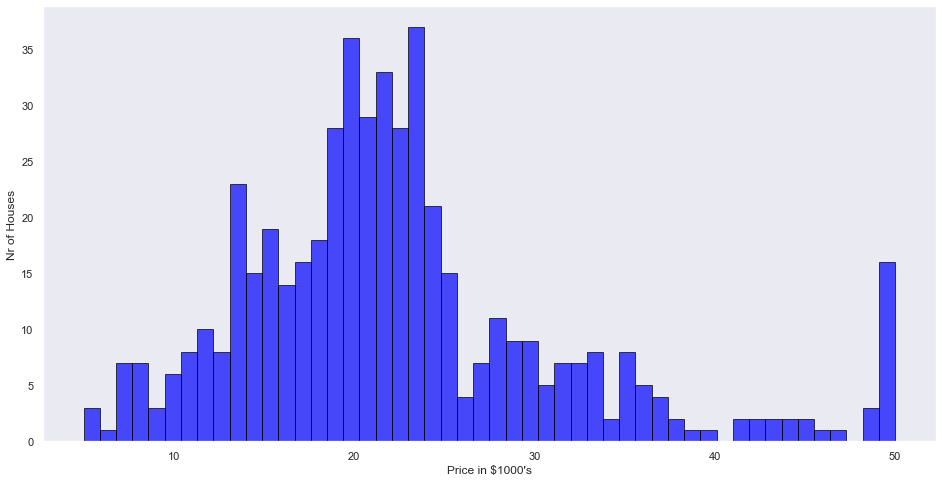

In [102]:
plt.figure(figsize= (16,8))
plt.hist(data['PRICE'], bins =50, ec = 'black', color = 'blue', alpha = 0.7)# bins 50...setting color by  hexcode
plt.xlabel('Price in $1000\'s')
plt.ylabel('Nr of Houses')
plt.show()

In [103]:
# The plot above has a skew.....Its not balanced by the middle value
# Lets find the skew..
data['PRICE'].skew()

1.1080984082549072

In [104]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [105]:
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [106]:
y_log.skew()

-0.33032129530987864

In [107]:
data['PRICE'].skew()

1.1080984082549072

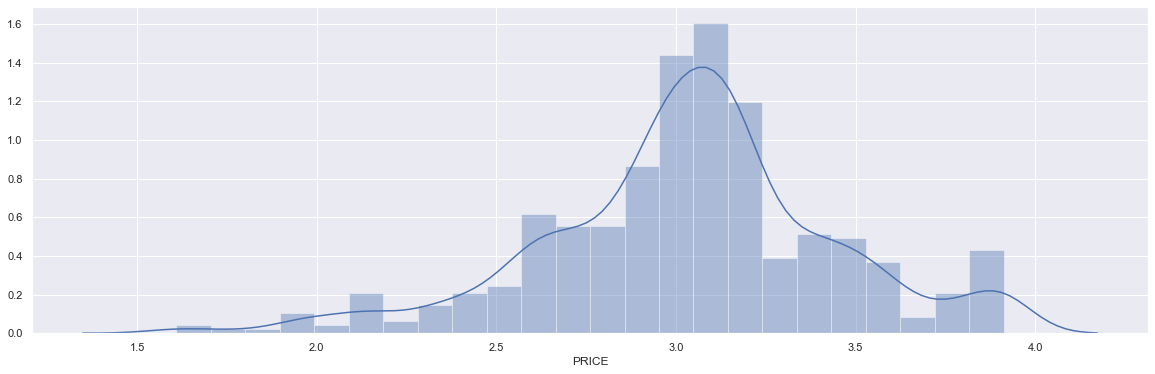

In [108]:
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(y_log)
plt.show()


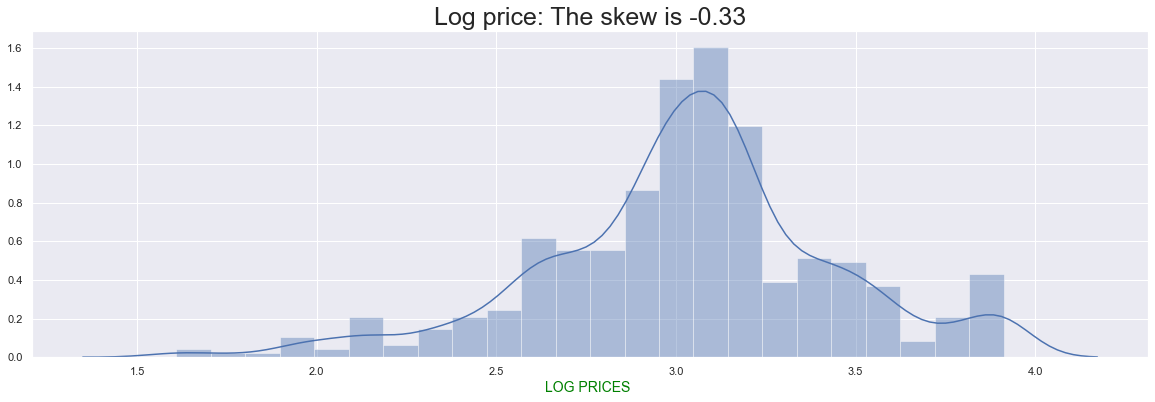

In [109]:
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(y_log)
plt.title(f'Log price: The skew is {round(y_log.skew(),2)}', fontsize = 25)# note the f string used to print the y_log.skew()
plt.xlabel('LOG PRICES ', fontsize =14, color = 'green' )
plt.show()

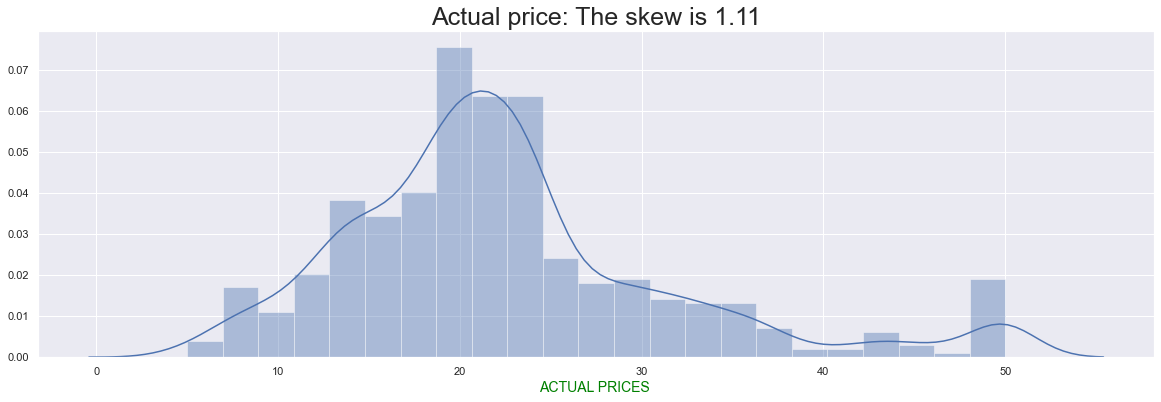

In [110]:
#plot before log transformation for comparison
skew=round(data['PRICE'].skew(),2)
sns.set()
plt.figure(figsize=(20,6))
sns.distplot(data['PRICE'])
plt.title(f'Actual price: The skew is {skew}', fontsize = 25)
plt.xlabel( 'ACTUAL PRICES ', fontsize =14, color = 'green' )
plt.show()

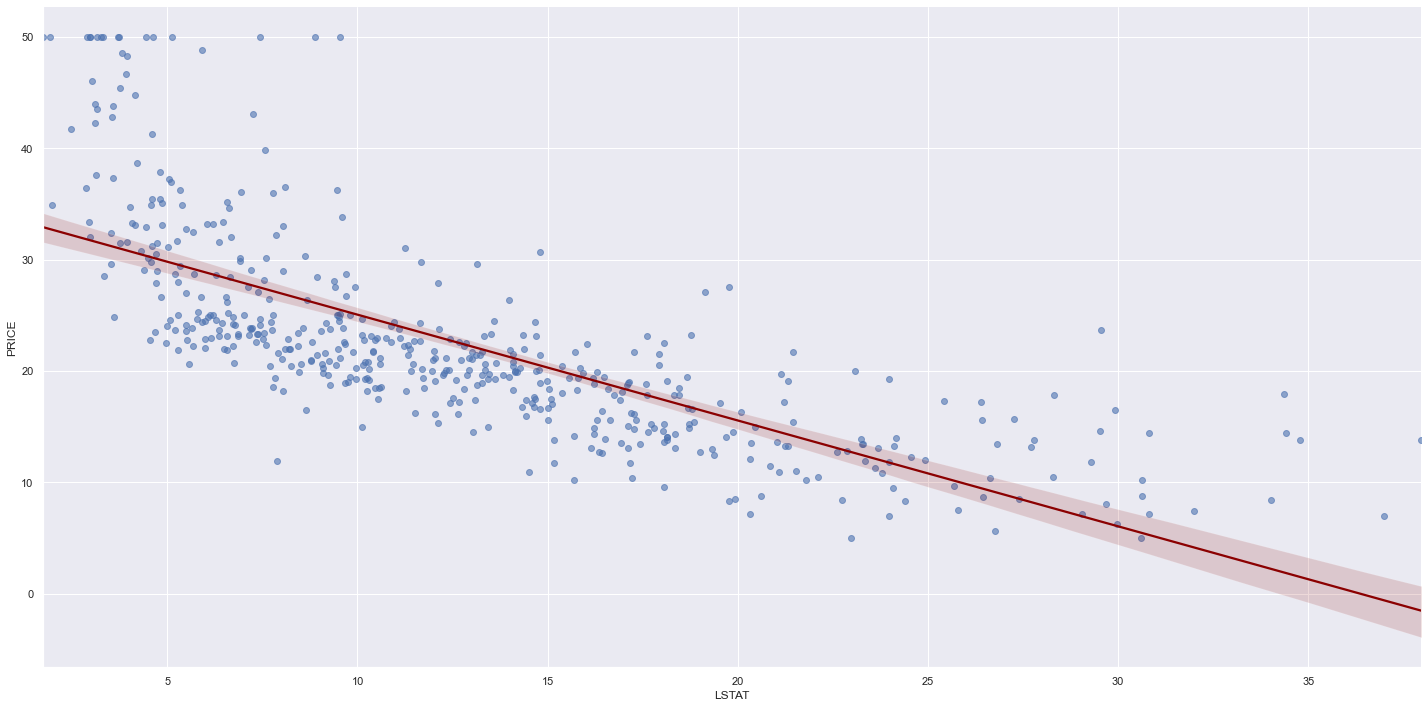

In [111]:
# doing a scatter plot with LSTAT vs PRICE .....on untransformed data...using sns......
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=10, aspect =2, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()


In [112]:
# doing a scatter plot with LSTAT vs PRICE .....on log transformed data...using sns......
# transforming the price into log price

In [113]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [114]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
transformed_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LOG_PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.178054
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,3.072693
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3.546740
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3.508556
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,3.109061
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,3.025291
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,3.173878
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,3.091042


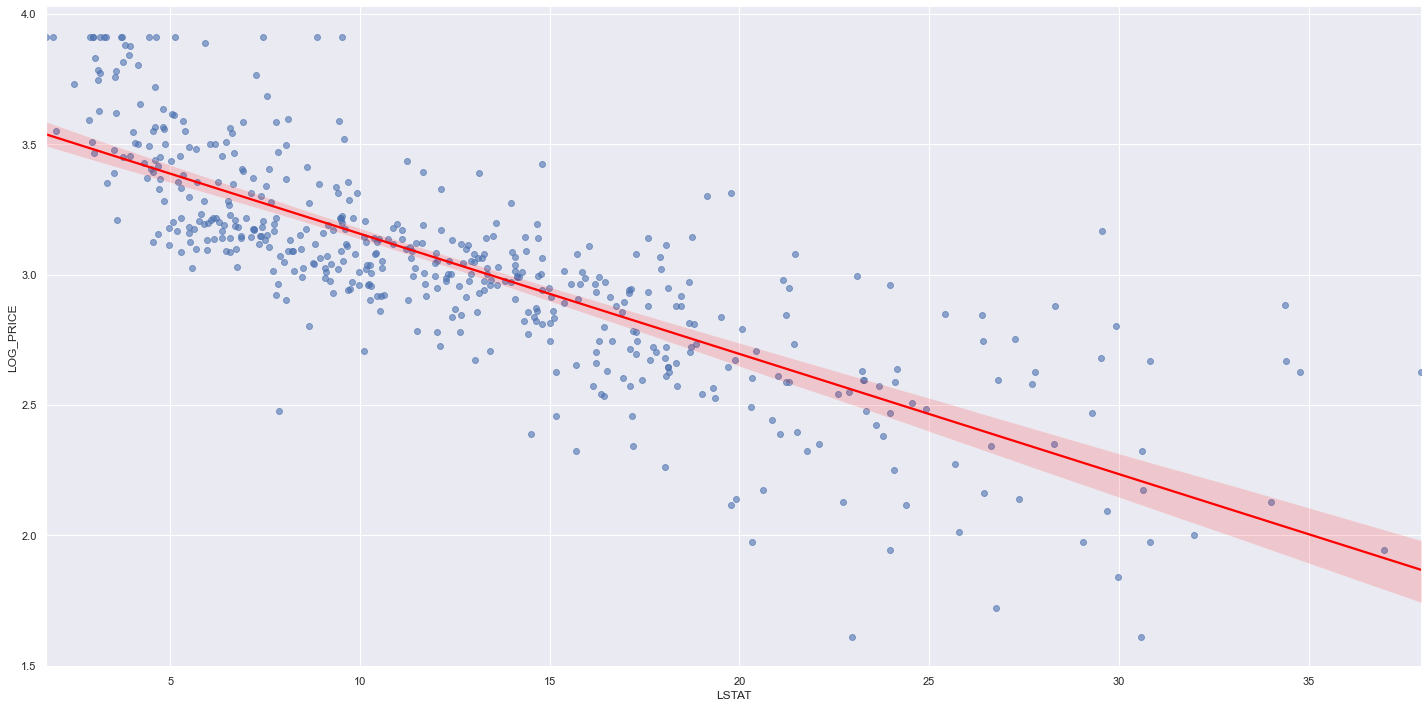

In [115]:
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=10, aspect =2, 
           scatter_kws={'alpha': 0.6}, line_kws={'color':'red'})
plt.show()

### linear regression for log_prices

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [117]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [118]:
print('Training data r-squared:', regr.score(X_train, y_train))

Training data r-squared: 0.7930234826697583


In [119]:
print('Test data r-squared:', regr.score(X_test, y_test))

Test data r-squared: 0.7446922306260724


In [120]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [121]:
print('Intercept', regr.intercept_)# intercept after log transformation of prices

Intercept 4.05994387177519


In [122]:
# CHAS 0.080331.....(got after the prices were log transformed)
# how to retranform?
np.e**0.080331

1.0836456950439142

In [123]:
# using statsmodel to get p values
results=sm.OLS(y_train,sm.add_constant(X_train)).fit()

In [124]:
results.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [125]:
results.pvalues

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64

In [126]:
round(results.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.009
INDUS      0.445
CHAS       0.038
NOX        0.000
RM         0.000
AGE        0.209
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [127]:
# from the above INDUS and AGE have p values greater than 0.05

In [128]:
# Multicollinearity....VIF......Variance inflation factor.....

In [129]:
variance_inflation_factor(exog=sm.add_constant(X_train).values,exog_idx=10)

8.508856493040817

In [130]:
variance_inflation_factor(exog=sm.add_constant(X_train).values,exog_idx=13)

2.812544292793034

In [131]:
X_incl_const=sm.add_constant(X_train)

In [132]:
X_incl_const

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [133]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [134]:
X_incl_const.shape[1]

14

In [135]:
# write a loop for gettig all the VIF...and if any feature has a VIF of > 10.....
# then I have a pblm of multi collinearity

In [136]:
vif=[] #empty list

for i in range (X_incl_const.shape[1]):
    
    vif.append(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [137]:
pd.DataFrame(data=vif,index=X_incl_const.columns,columns=['vif'])

,vif
const,597.548713
CRIM,1.714525
ZN,2.332822
INDUS,3.943449
CHAS,1.078813
NOX,4.410321
RM,1.840405
AGE,3.326766
DIS,4.222923
RAD,7.314300


In [138]:
pd.DataFrame({'coef_name':X_incl_const.columns, 'vif':vif})

,coef_name,vif
0,const,597.548713
1,CRIM,1.714525
2,ZN,2.332822
3,INDUS,3.943449
4,CHAS,1.078813
5,NOX,4.410321
6,RM,1.840405
7,AGE,3.326766
8,DIS,4.222923
9,RAD,7.314300


In [139]:
# Bayesian information Criterion....???
# Model 1 and Model 2
#  150         101
# Lower the BIC the better....
# Model 1 has a BIC of 256
# Model 2 has a BIC of 384
# Model 3 has a BIC of 192
# Choose the one with the lowest BIC..
# what is this BIC....
# overfitting......

In [140]:
# BIC Test
# This model is using all the features and the log prices...

In [141]:
# model_1
model_1 = sm.OLS(y_train, X_incl_const)
results_1 = model_1.fit()
results_1.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [142]:
round(results_1.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.009
INDUS      0.445
CHAS       0.038
NOX        0.000
RM         0.000
AGE        0.209
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [143]:
round(results_1.bic,2)

-139.75

In [144]:
# Another model_2 after dropping the INDUS(high p value) and using the log prices..
X_incl_const = X_incl_const.drop(['INDUS'], axis = 1)
model_2 = sm.OLS(y_train, X_incl_const)
results_2 = model_2.fit()
results_2.params

const      4.056231
CRIM      -0.010721
ZN         0.001551
CHAS       0.082795
NOX       -0.673365
RM         0.071739
AGE        0.000766
DIS       -0.049394
RAD        0.014014
TAX       -0.000596
PTRATIO   -0.034126
B          0.000511
LSTAT     -0.031262
dtype: float64

In [145]:
round(results_2.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.010
CHAS       0.032
NOX        0.000
RM         0.000
AGE        0.207
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [146]:
round(results_2.bic,2)

-145.15

In [147]:
# third model_3 after dropping the INDUS and the AGE, and using the log prices..

In [148]:
# X_incl_const = sm.add_constant(X_train)
#X_incl_const = X_incl_const.drop(['INDUS', 'AGE'],axis = 1)
#  OR
X_incl_const = X_incl_const.drop(['AGE'],axis = 1)
model_3 = sm.OLS(y_train, X_incl_const)
results_3 = model_3.fit()
results_3.params

const      4.035922
CRIM      -0.010702
ZN         0.001461
CHAS       0.086449
NOX       -0.616448
RM         0.076133
DIS       -0.052692
RAD        0.013743
TAX       -0.000590
PTRATIO   -0.033481
B          0.000518
LSTAT     -0.030271
dtype: float64

In [149]:
round(results_3.pvalues,3)

const      0.000
CRIM       0.000
ZN         0.014
CHAS       0.025
NOX        0.000
RM         0.000
DIS        0.000
RAD        0.000
TAX        0.000
PTRATIO    0.000
B          0.000
LSTAT      0.000
dtype: float64

In [150]:
round(results_3.bic,2)

-149.5

In [151]:
model_1_df = pd.DataFrame({'M1_Coef': results_1.params, 'M1_Pvalues' : round(results_1.pvalues,3)})
model_1_df

,M1_Coef,M1_Pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [152]:
model_2_df = pd.DataFrame({'M2_Coef': results_2.params, 'M2_Pvalues' : round(results_2.pvalues,3)})
model_2_df

,M2_Coef,M2_Pvalues
const,4.056231,0.000
CRIM,-0.010721,0.000
ZN,0.001551,0.010
CHAS,0.082795,0.032
NOX,-0.673365,0.000
RM,0.071739,0.000
AGE,0.000766,0.207
DIS,-0.049394,0.000
RAD,0.014014,0.000
TAX,-0.000596,0.000


In [153]:
model_3_df = pd.DataFrame({'M3_Coef': results_3.params, 'M3_Pvalues' : round(results_3.pvalues,3)})
model_3_df

,M3_Coef,M3_Pvalues
const,4.035922,0.000
CRIM,-0.010702,0.000
ZN,0.001461,0.014
CHAS,0.086449,0.025
NOX,-0.616448,0.000
RM,0.076133,0.000
DIS,-0.052692,0.000
RAD,0.013743,0.000
TAX,-0.000590,0.000
PTRATIO,-0.033481,0.000


In [154]:
frames=[model_1_df,model_2_df,model_3_df]

In [155]:
pd.concat(frames,axis=1)

,M1_Coef,M1_Pvalues,M2_Coef,M2_Pvalues,M3_Coef,M3_Pvalues
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


In [156]:
print(f'BIC WITH ALL::   {results_1.bic}: W/O INDUS {results_2.bic}: W/O INDUS AND AGE {results_3.bic} ')

BIC WITH ALL::   -139.74997769478875: W/O INDUS -145.14508855591163: W/O INDUS AND AGE -149.49934294224656 


In [157]:
print(f'RSQD:: WITH ALL {(results_1.rsquared)}: W/O INDUS {results_2.rsquared}: W/O INDUS,AGE {results_3.rsquared}')

RSQD:: WITH ALL 0.7930234826697582: W/O INDUS 0.7927126289415163: W/O INDUS,AGE 0.7918657661852815


In [158]:
# Residuals......diff b/n the Actual Value and predicted vale

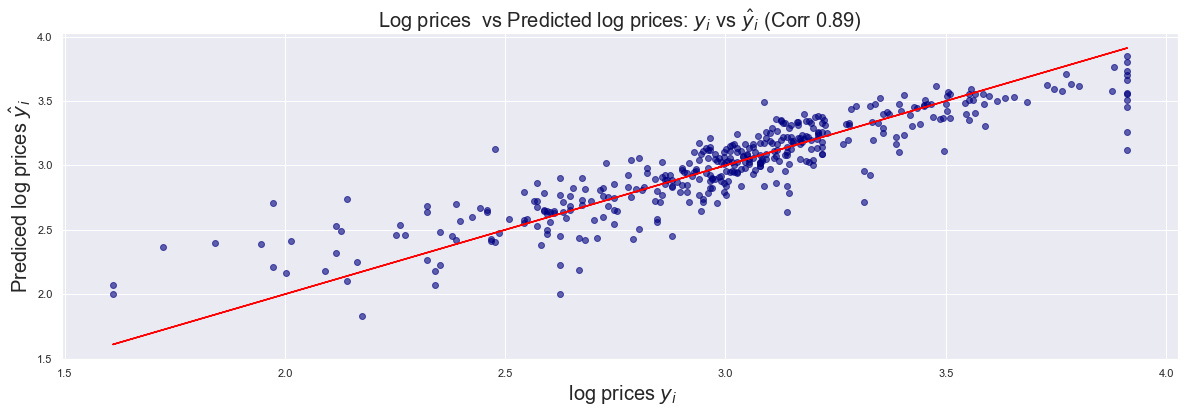

In [159]:
prices = np.log(data['PRICE']) # Use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)# dropping the INDUS , AGE also along with PRICE which has been moved


X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)
# Using Statsmodel
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()# obtaining the regression coeffs including the constant(intercept). 

# commented out lines below can be used to look at the residuals.
# 1. # residuals = y_train - results.fittedvalues
# 2. results.resid

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)# correlation rounded
plt.figure(figsize=(20,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)# gives a scatter plot
plt.plot(y_train, y_train, color='red')#the "ideal regression" line......not a reality

plt.xlabel(' log prices $y _i$', fontsize=20)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=20)
plt.title(f'Log prices  vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=20)

plt.show()

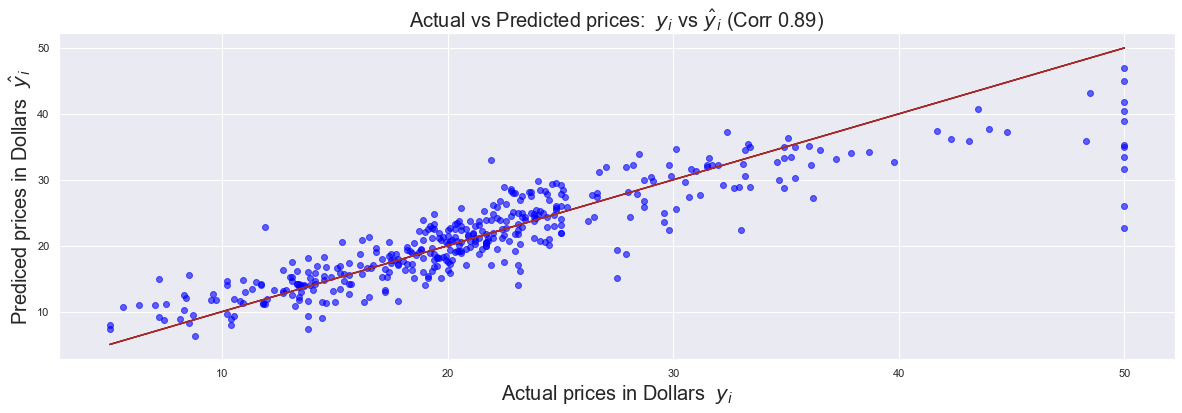

In [160]:
# Actual Prices vs Predicted Prices in 1000's of Dollars
plt.figure(figsize=(20,6))
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='brown')

plt.xlabel('Actual prices in Dollars  $y _i$', fontsize=20)
plt.ylabel('Prediced prices in Dollars  $\hat y _i$', fontsize=20)
plt.title(f'Actual vs Predicted prices:  $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=20)

plt.show()


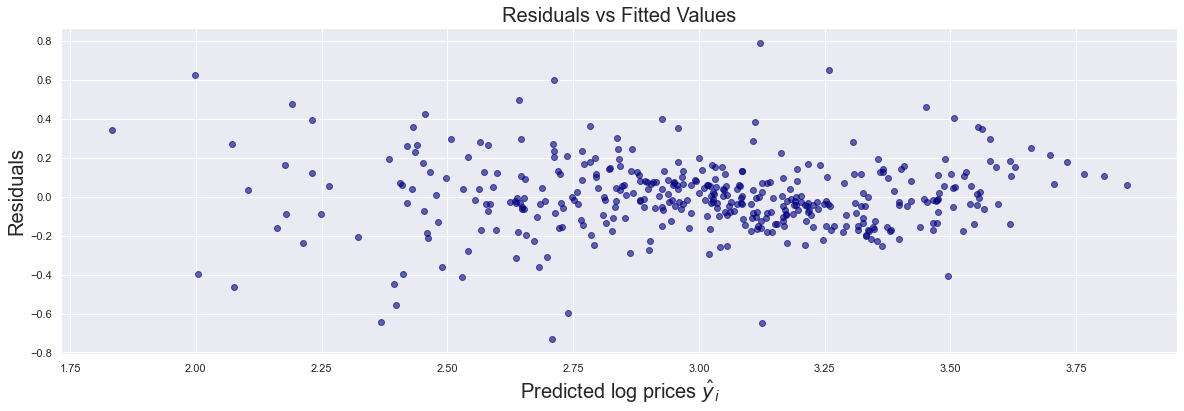

reduced_log_mse =  0.035
reduced_log_rsquared =  0.792


In [161]:
# Residuals vs Predicted values

plt.figure(figsize=(20,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Fitted Values', fontsize=20)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

print('reduced_log_mse = ',round(results.mse_resid, 3))# for later use and comparision
print('reduced_log_rsquared = ',round(results.rsquared, 3)) # for later use and comparision


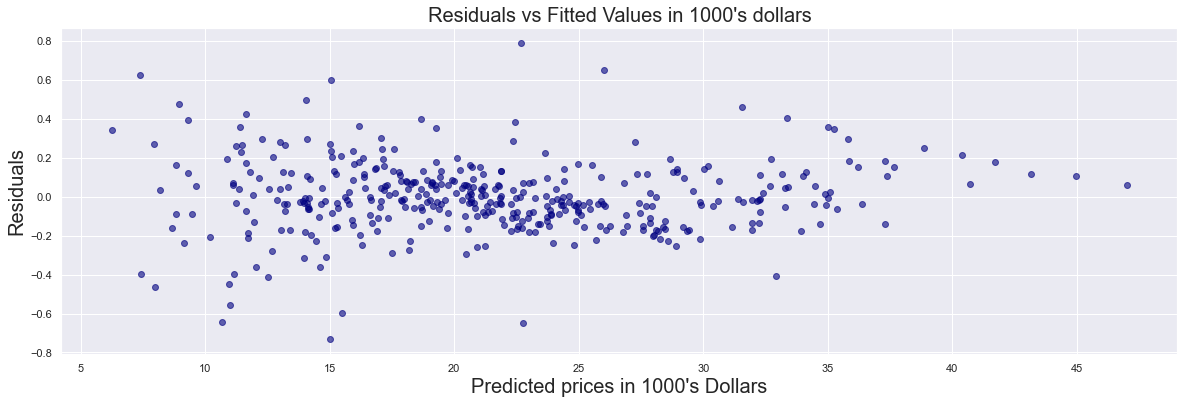

In [162]:
# Residuals vs Predicted values in 1000's Dollars

plt.figure(figsize=(20,6))
plt.scatter(x=np.e**results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Predicted prices in 1000\'s Dollars', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Fitted Values in 1000\'s dollars', fontsize=20)

plt.show()


In [163]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
print(resid_mean, '\n'); print(resid_skew) # printing the mean and skew, both a close to zero

-0.0 

0.118


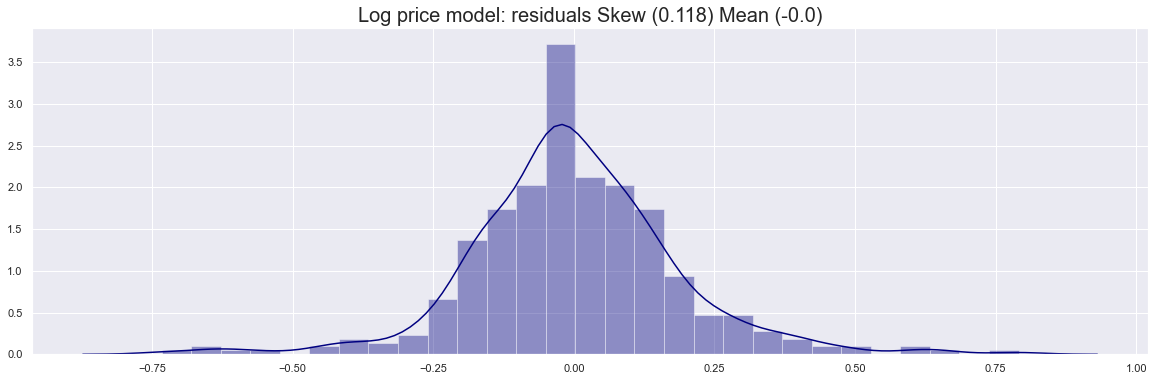

In [164]:
plt.figure(figsize= (20,6))
sns.distplot(results.resid, color='navy')# using the distplot of seaborn
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})',fontsize=20)
plt.show()


In [165]:
# Using the original model with all the features and normal prices generate:
# Plot of actual vs predicted prices (incl. correlation) 
# Plot of residuals vs. predicted prices
# Plot of distribution of residuals (incl. skew)
# Analysis of results. 

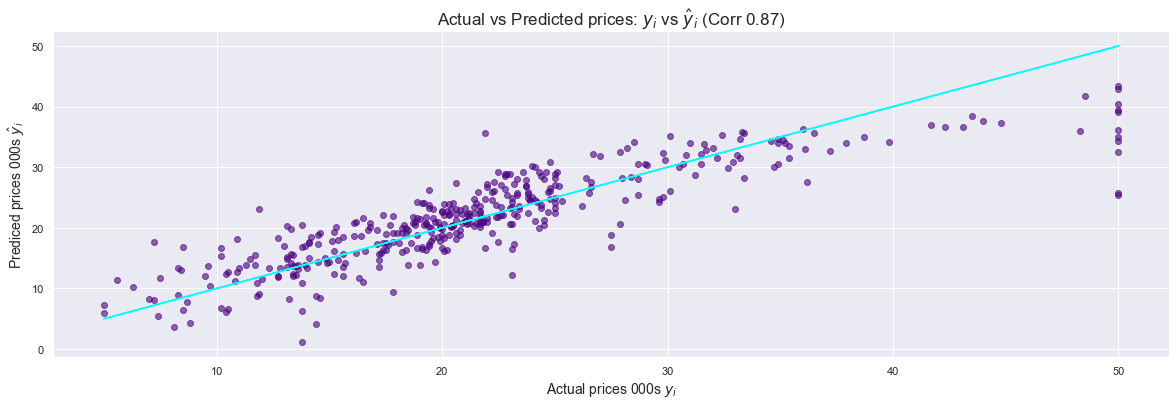

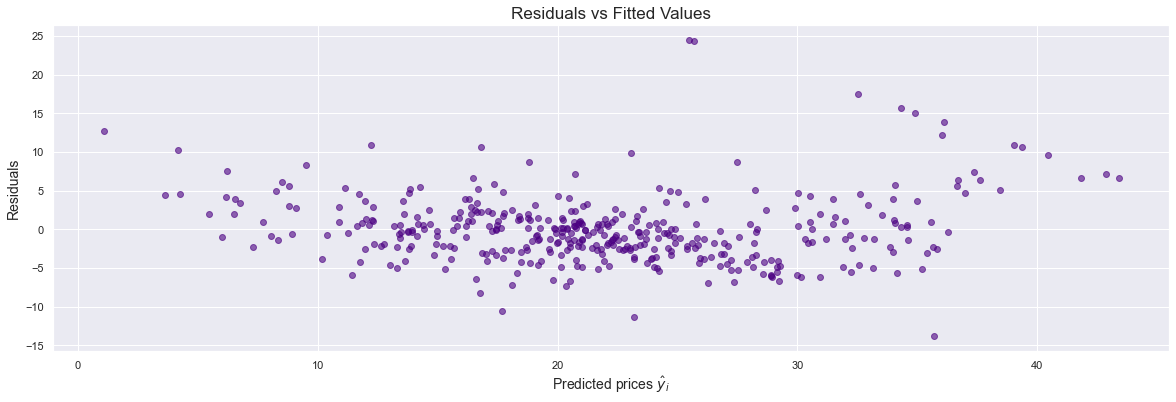

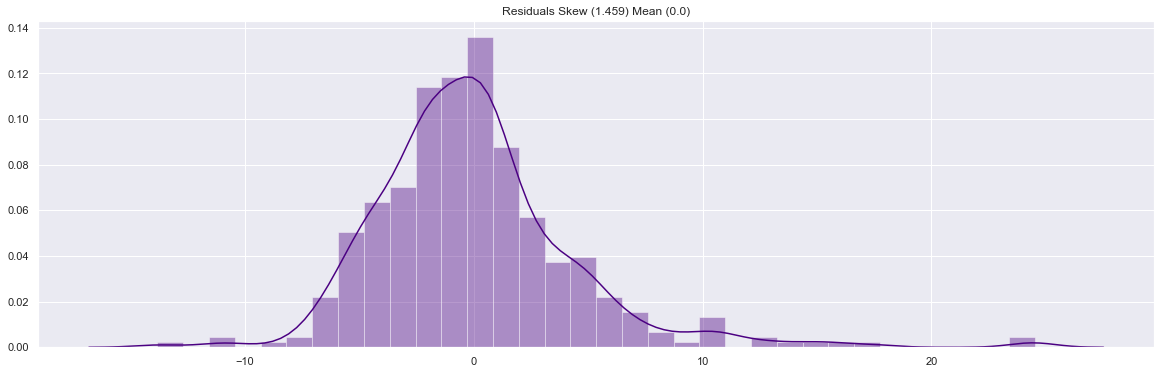

In [166]:
# Original model: normal prices & all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(20,6))
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(20,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
plt.figure(figsize=(20,6))
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)# for later use
full_normal_rsquared = round(results.rsquared, 3) # for later use

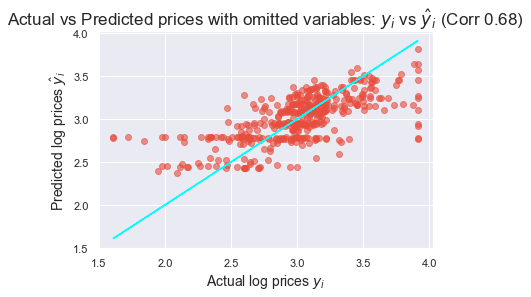

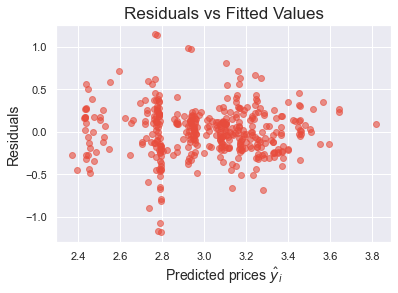

In [167]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)# for later use
omitted_var_rsquared = round(results.rsquared, 3)# for later use


In [168]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
                 'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse]}, 
                     index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE
Reduced Log Model,0.792,0.035
Full Normal Price Model,0.750,19.921
Omitted Var Model,0.460,0.090


In [169]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},# taking the square root of MSE to get RMSE. 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [170]:
# use reduced log model...
# Estimated price is 30,000 DOllars for a house...
# calculate the upper bound and lower bound of the prices..
# from the above DF MSE = 0.035

In [171]:
np.sqrt(reduced_log_mse)

0.18708286933869708

In [172]:
2*np.sqrt(reduced_log_mse)

0.37416573867739417

In [173]:
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)

In [174]:
(np.e**upper_bound)*1000

43613.34233239937

In [175]:
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

In [176]:
(np.e**lower_bound)*1000

20635.886906824155

In [178]:
# micro project


# Predict the price of a house with high confidence(95% confidence)
# adjust for price inflation by multiplying the values by 30
# The house should have 4 rooms, 
# the Area where the house is located should have a school with PT ratio 10
# The house should be near the Charles river
# inputs must be given from the KB
# negative rooms  and zero rooms...not allowed
# same with PT ratio.....
# Charles river.....Choice (Yes/no)...set yes = 1 and no = 0



# Date of discussion tentatively on the 3rd September 2020.
# please dont send me codes....
# please dont ask me doubts before the 3rd September 2020



# ==> Follow ==> Micro Project [BOSTON DATASET]